In [1]:
import import_ipynb
import Scanpy_functions_v03262021 as sc_pipe
import scvelo as scv
scv.logging.print_version()
import warnings
import scirpy as ir
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
import bbknn
import logging
from sklearn.mixture import GaussianMixture
from scipy.stats     import norm
import glob
import os
import hvplot.pandas
import docx
from docx import Document
from docx.shared import Inches
from docx.shared import Pt
from scipy import sparse
import scanpy.external as sce
import holoviews as hv
import panel as pn
import bokeh
from bokeh.resources import INLINE
import scanorama
import gseapy

importing Jupyter notebook from Scanpy_functions_v03262021.ipynb
Running scvelo 0.2.3 (python 3.8.5) on 2022-02-14 13:21.
Running scvelo 0.2.3 (python 3.8.5) on 2022-02-14 13:22.


In [2]:
# define sample metadata. Usually read from a file.
exclude_genes = ['Rpl', 'Rps', 'Trav', 'Traj', 'Trbj', 'Trbv','Mrp','Fau','Dap3','Uba52','Ighv', 'Igkv', 'Iglv']


In_path = '/user/ifrec/liuyuchen/scRNASeq_DATA/Akira_Fukusima_scRNASeq/'

out_path = '/user/ifrec/liuyuchen/Analysis_Reports/Akira_Fukusima_scRNASeq/'

In [3]:
#sc.set_figure_params(scanpy=True, dpi=200,  figsize=[12.8,9.6])
sc.settings.verbosity = 3

In [4]:
#human = sc.read_h5ad(out_path+'/human_ingested_label_all_sample.h5ad')
mouse = sc.read_h5ad(out_path+'/mouse_labeled.h5ad')

## Integration of Mouse

In [5]:
samples = {}
sample_list = In_path+'mouse/sample_list.txt'
for line in open(sample_list):
    tag= line.strip()
    samples[tag] ={}
adata_list = sc_pipe.data_IO(samples,In_path+'mouse/',IG=False,Velo=True)

... reading from cache file cache/user-ifrec-liuyuchen-scRNASeq_DATA-Akira_Fukusima_scRNASeq-mouse-BLM_BAL_5DE-velocyto-BLM_BAL_5DE.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading /user/ifrec/liuyuchen/scRNASeq_DATA/Akira_Fukusima_scRNASeq/mouse/BLM_BAL_5DE/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)
... reading from cache file cache/user-ifrec-liuyuchen-scRNASeq_DATA-Akira_Fukusima_scRNASeq-mouse-BLM_Blood_5DE-velocyto-BLM_Blood_5DE.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading /user/ifrec/liuyuchen/scRNASeq_DATA/Akira_Fukusima_scRNASeq/mouse/BLM_Blood_5DE/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)
... reading from cache file cache/user-ifrec-liuyuchen-scRNASeq_DATA-Akira_Fukusima_scRNASeq-mouse-BLM_Lung_5DE-velocyto-BLM_Lung_5DE.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading /user/ifrec/liuyuchen/scRNASeq_DATA/Akira_Fukusima_scRNASeq/mouse/BLM_Lung_5DE/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)
... reading from cache file cache/user-ifrec-liuyuchen-scRNASeq_DATA-Akira_Fukusima_scRNASeq-mouse-Elastase_BAL_5DE-velocyto-Elastase_BAL_5DE.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading /user/ifrec/liuyuchen/scRNASeq_DATA/Akira_Fukusima_scRNASeq/mouse/Elastase_BAL_5DE/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)
... reading from cache file cache/user-ifrec-liuyuchen-scRNASeq_DATA-Akira_Fukusima_scRNASeq-mouse-Elastase_Lung_5DE-velocyto-Elastase_Lung_5DE.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading /user/ifrec/liuyuchen/scRNASeq_DATA/Akira_Fukusima_scRNASeq/mouse/Elastase_Lung_5DE/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)
... reading from cache file cache/user-ifrec-liuyuchen-scRNASeq_DATA-Akira_Fukusima_scRNASeq-mouse-mock_BAL_5DE-velocyto-mock_BAL_5DE.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading /user/ifrec/liuyuchen/scRNASeq_DATA/Akira_Fukusima_scRNASeq/mouse/mock_BAL_5DE/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:01)
... reading from cache file cache/user-ifrec-liuyuchen-scRNASeq_DATA-Akira_Fukusima_scRNASeq-mouse-mock_Blood_5DE-velocyto-mock_Blood_5DE.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading /user/ifrec/liuyuchen/scRNASeq_DATA/Akira_Fukusima_scRNASeq/mouse/mock_Blood_5DE/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)
... reading from cache file cache/user-ifrec-liuyuchen-scRNASeq_DATA-Akira_Fukusima_scRNASeq-mouse-mock_Lung_5DE-velocyto-mock_Lung_5DE.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


reading /user/ifrec/liuyuchen/scRNASeq_DATA/Akira_Fukusima_scRNASeq/mouse/mock_Lung_5DE/outs/filtered_feature_bc_matrix.h5


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


 (0:00:00)


In [6]:
adata = sc_pipe.unify_value(adata_list)

In [7]:
useless_columns= [ 'Clusters', '_X', '_Y']
for uc in useless_columns:
    del adata.obs[uc]

In [8]:
del adata_list

In [9]:
adata

View of AnnData object with n_obs × n_vars = 110795 × 32285
    obs: 'initial_size_spliced', 'initial_size_unspliced', 'initial_size', 'Sample', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [10]:
mouse 

AnnData object with n_obs × n_vars = 93597 × 22233
    obs: 'Sample', 'batch', 'pct_counts_mt', 'pct_counts_ribo', 'pct_counts_hb', 'doublet_score', 'predicted_doublet', 'n_counts', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'log_counts', 'leiden', 'Conditions', 'Organ', 'Cell_Type', 'SatM_like'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Cell_Type_colors', 'Conditions_colors', 'Organ_colors', 'Sample_colors', 'SatM_like_colors', 'dendrogram_leiden', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'rank_genes_groups', 'rank_genes_samples', 'umap'
    obsm: 'X_pca', 'X_sca

In [11]:
#adata.obs.Sample=adata.obs.Sample.apply(lambda x: '_'.join(str(x).split('_')[:2]))

a = dict(zip(mouse.obs['batch'],mouse.obs['Sample']))
b = dict(zip(adata.obs['batch'],adata.obs['Sample']))
a==b

True

In [12]:
a

{'0': 'BLM_BAL_5DE',
 '1': 'BLM_Blood_5DE',
 '2': 'BLM_Lung_5DE',
 '3': 'Elastase_BAL_5DE',
 '4': 'Elastase_Lung_5DE',
 '5': 'mock_BAL_5DE',
 '6': 'mock_Blood_5DE',
 '7': 'mock_Lung_5DE'}

In [13]:
b

{'0': 'BLM_BAL_5DE',
 '1': 'BLM_Blood_5DE',
 '2': 'BLM_Lung_5DE',
 '3': 'Elastase_BAL_5DE',
 '4': 'Elastase_Lung_5DE',
 '5': 'mock_BAL_5DE',
 '6': 'mock_Blood_5DE',
 '7': 'mock_Lung_5DE'}

In [14]:
adata.obs.index= [str(x).split('-')[0]+'-1-'+str(x).split('-')[-1] for x in adata.obs.index]
adata.obs_names = [str(x).split('-')[0]+'-1-'+str(x).split('-')[-1] for x in adata.obs_names]

In [15]:
adata=adata[mouse.obs.index]

In [16]:
genes = set(adata.var_names).intersection(set(mouse.var_names))

In [17]:
adata = adata[:,list(genes)]

In [18]:
for c in [adata.var.columns]:
    mouse.var[c] = adata.var[c]

In [19]:
for c in [adata.obs.columns]:
    mouse.obs[c] = adata.obs[c]

In [20]:
mouse.layers= adata.layers

In [21]:
adata = mouse

Normalized count data: spliced, unspliced.
computing neighbors
    finished (0:00:58) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:21) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)
recovering dynamics (using 20/352 cores)


  0%|          | 0/279 [00:00<?, ?gene/s]

    finished (0:34:27) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
computing velocities
    finished (0:00:53) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph
    finished (0:00:29) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    545 total control genes are used. (0:00:02)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    628 total control genes are used. (0:00:02)
-->     'S_score' and 'G2M_score', scores of cell cycle phases (adata.obs)


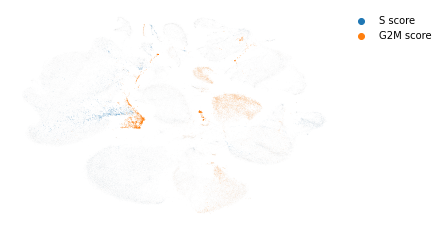

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


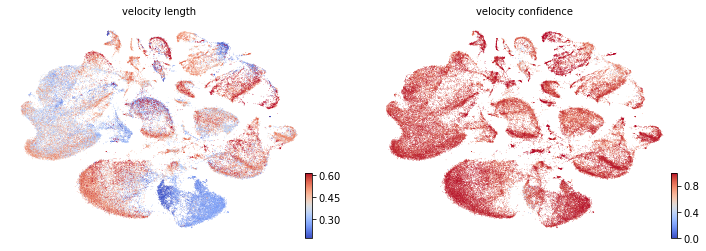

computing velocity embedding
    finished (0:00:42) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


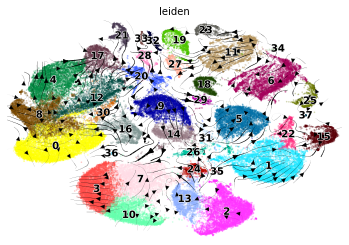

In [22]:
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
scv.tl.recover_dynamics(adata,n_jobs=20)
scv.tl.velocity(adata, mode='dynamical')
scv.tl.velocity_graph(adata)
scv.tl.score_genes_cell_cycle(adata)
scv.pl.scatter(adata, color_gradients=['S_score', 'G2M_score'], smooth=True, perc=[5, 95])
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95])
#scv.pl.paga(adata, basis='umap', size=50, alpha=.1,min_edge_width=2, node_size_scale=0.5)
scv.pl.velocity_embedding_stream(adata, basis='umap',color = 'leiden')

computing terminal states
    identified 10 regions of root cells and 10 regions of end points .
    finished (0:06:52) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:01:48) --> added 
    'latent_time', shared time (adata.obs)


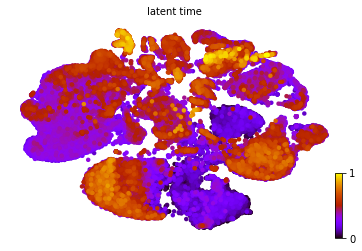

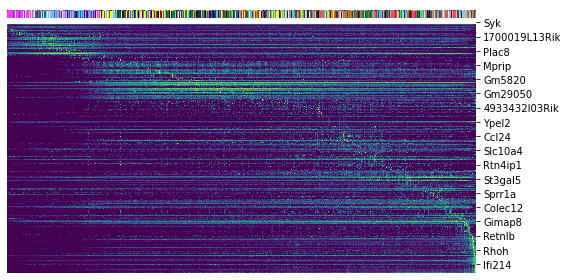

running PAGA using priors: ['latent_time']
    finished (0:00:36) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


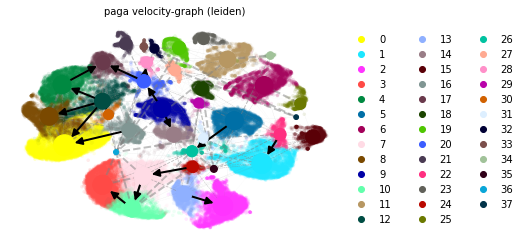

In [23]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=80)
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:300]
scv.pl.heatmap(adata, var_names=top_genes, sortby='latent_time', col_color='leiden', n_convolve=100)
scv.tl.paga(adata, groups='leiden',use_time_prior='latent_time')
scv.pl.paga(adata, basis='umap', size=50, alpha=.1,
            min_edge_width=2, node_size_scale=1.5)

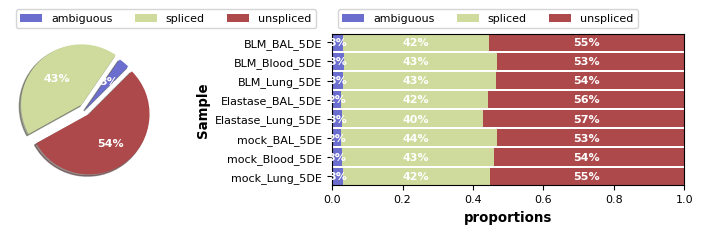

In [24]:
scv.pl.proportions(adata,groupby='Sample',layers=['ambiguous', 'spliced', 'unspliced'])

In [29]:
del adata.obs['predicted_doublet']

In [ ]:
adata.write(out_path+'/mouse_velocity_integrated_all_sample.h5ad')